In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

Задание:

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [2]:
data = pd.read_csv('data/training_mush.csv')
X_train = data.drop('class', axis=1)
y_train = data.pop('class')
x_test = pd.read_csv('data/testing_mush.csv')
y_true = pd.read_csv('data/testing_y_mush.csv')

In [3]:
clf = RandomForestClassifier(random_state=0)

params = {'criterion': ['entropy'],
          'n_estimators': range(10, 51, 10), 
          'max_depth': range(1, 13, 2), 
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}

In [4]:
grid_clf = GridSearchCV(clf, param_grid=params, cv=3)
best = grid_clf.fit(X_train, y_train)

In [8]:
clf_rf = best.best_estimator_
print(clf_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Задание:

Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [6]:
y_pred = clf_rf.predict(x_test)
print('Несъедобные грибы: ', y_pred.sum())

Несъедобные грибы:  976


Задание:

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам.

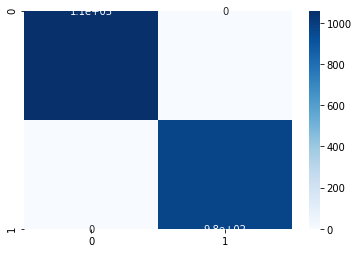

In [7]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")